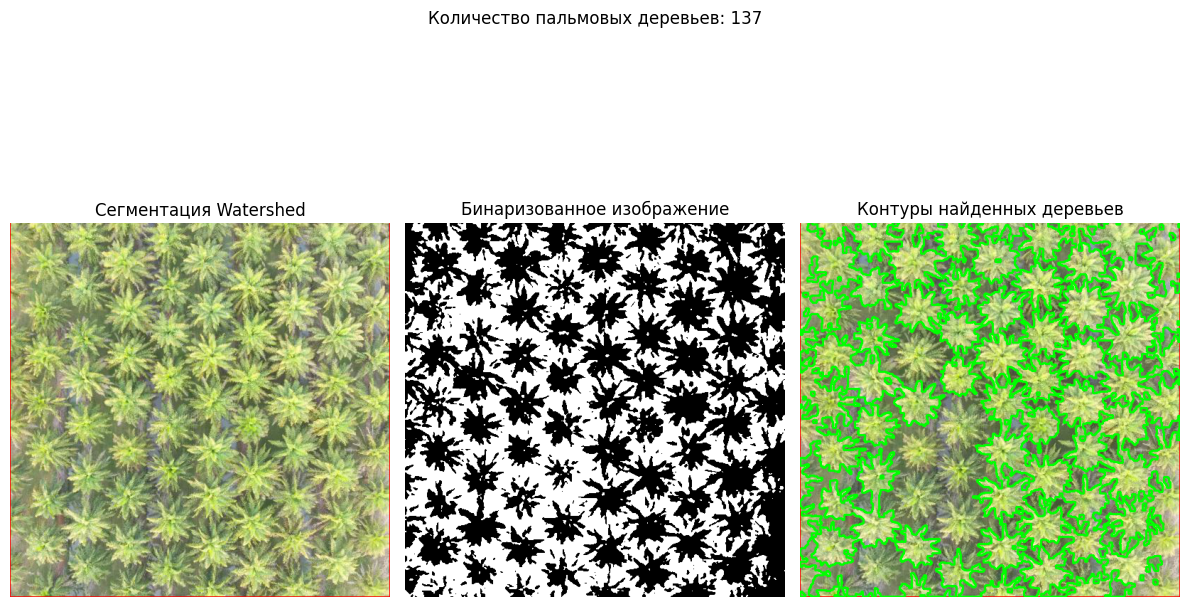

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('palm_1.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
ret, markers = cv2.connectedComponents(morph)
markers = markers + 1  
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  
num_trees = len(np.unique(markers)) - 1  
contour_image = image.copy()
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Сегментация Watershed")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title("Бинаризованное изображение")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(contour_image)
plt.title("Контуры найденных деревьев")
plt.axis('off')

plt.suptitle(f'Количество пальмовых деревьев: {num_trees}')
plt.tight_layout()
plt.show()
